In [ ]:
!pip install tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard
    Found existing installation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sklearn
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import zipfile

zip_dir = zipfile.ZipFile("/content/drive/MyDrive/Ai_Ml_data/Image Classification/train.zip")
zip_dir.extractall()
zip_dir.close()

In [ ]:
import zipfile

zip_dir = zipfile.ZipFile("/content/drive/MyDrive/Ai_Ml_data/Image Classification/validation.zip")
zip_dir.extractall()
zip_dir.close()

In [ ]:
import os

for root, dir, files in os.walk("train"):
    print(f"{root} contains {len(files)} files")

train contains 0 files
train/cucumber contains 899 files
train/cabbage contains 222 files
train/banana contains 1035 files
train/potato contains 462 files
train/lemon contains 879 files
train/mango contains 154 files
train/soy beans contains 176 files
train/pineapple contains 1226 files
train/apple contains 297 files
train/ginger contains 156 files
train/cauliflower contains 871 files
train/spinach contains 174 files
train/jalepeno contains 160 files
train/sweetcorn contains 161 files
train/corn contains 868 files
train/grapes contains 534 files
train/garlic contains 166 files
train/chilli pepper contains 148 files
train/watermelon contains 542 files
train/beetroot contains 171 files
train/lettuce contains 176 files
train/peas contains 556 files
train/carrot contains 414 files
train/sweetpotato contains 147 files
train/tomato contains 174 files
train/kiwi contains 160 files
train/turnip contains 172 files
train/onion contains 469 files
train/pomegranate contains 866 files
train/orange 

### View random image

In [ ]:
import random

# View random images
def view_random_image(img_dir, target_class):
  img_path_list = []
  total_images = 0

  for root, dir, images in os.walk(img_dir):
    for img in images:
      img_path = f"{root}/{img}"
      img_path_list.append(img_path)

  total_images = len(img_path_list)

  random_image_number = random.randint(0, total_images-1)
  random_image_path = img_path_list[random_image_number]

  img = mpimg.imread(random_image_path)
  imgplot = plt.imshow(img)
  plt.title(target_class)
  plt.axis(False)
  plt.show()


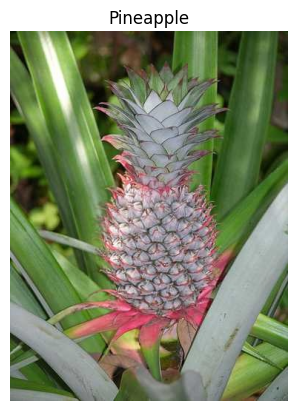

In [ ]:
view_random_image(img_dir="train/pineapple", target_class="Pineapple")

In [ ]:
# set the seed
tf.random.set_seed(42)

# Preprocess data
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # how much do you want to rotate the image?
                                             shear_range=0.2, # How much do you want to shear the image?
                                             zoom_range=0.2, # How much do you want to zoom the image?
                                             width_shift_range=0.2, # How much you want your image to move around x-axis?
                                             height_shift_range=0.2, # How much you want your image to move around y-axis?
                                             horizontal_flip=True, # Do you want to flip the image horizontally
                                             vertical_flip=True) # Do you want to flip the image vertically

valid_datagen = ImageDataGenerator(rescale=1/255.)

# Setup path to our data directories
train_dir = "train"
valid_dir = "validation"

# Import data from directories and turn it into batches
train_data = train_datagen_augmented.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=valid_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)

Found 18291 images belonging to 36 classes.
Found 1532 images belonging to 36 classes.


<ipython-input-10-fd8d6deab85f>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 3, i+1)


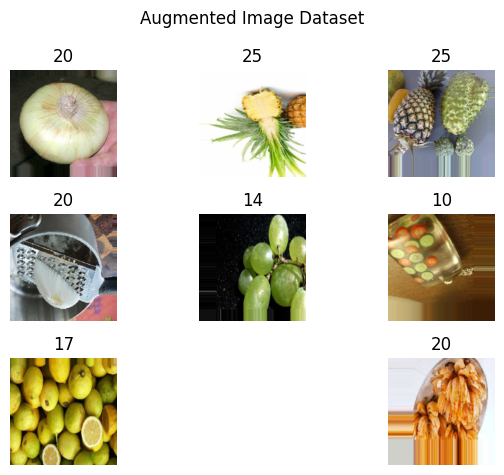

In [ ]:
images, labels = next(train_data)

plt.suptitle("Augmented Image Dataset")

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title(np.argmax(labels[i]))
    plt.axis(False);
    plt.tight_layout()


In [ ]:
num_classes = train_data.num_classes
num_classes

36

In [ ]:
inception_v3_url = "https://www.kaggle.com/models/google/inception-v3/TensorFlow2/classification/2"
mobilenet_v2_url = "https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/2"
resnet_v2_url = "https://www.kaggle.com/models/google/resnet-v2/TensorFlow2/101-classification/2"

In [ ]:
import tensorflow_hub as hub

IMG_SHAPE = (224, 224)

def create_model(model_url, num_classes = 36):
    feature_extractor_layer = hub.KerasLayer(model_url,
                                             trainable=False,
                                             name="feature_extraction_layer",
                                             input_shape=IMG_SHAPE + (3,))

    model = tf.keras.Sequential([
        feature_extractor_layer,
        tf.keras.layers.Dense(num_classes, activation="softmax", name="output_layer")
    ])

    return model

In [ ]:
# Using mobilenet_v2 Model
# Link :- https://www.kaggle.com/models/google/mobilenet-v2/tensorFlow2/035-128-classification

model = create_model(model_url = mobilenet_v2_url,
                     num_classes = num_classes)

model.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
history = model.fit(train_data,
                      steps_per_epoch=len(train_data),
                      epochs=10,
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/10
 35/572 [>.............................] - ETA: 22:49 - loss: 2.9474 - accuracy: 0.3018

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


572/572 [==============================] - 1533s 3s/step - loss: 1.0967 - accuracy: 0.6944 - val_loss: 0.6164 - val_accuracy: 0.8087
Epoch 2/10
572/572 [==============================] - 1568s 3s/step - loss: 0.6973 - accuracy: 0.7902 - val_loss: 0.5323 - val_accuracy: 0.8440
Epoch 3/10
572/572 [==============================] - 1552s 3s/step - loss: 0.6145 - accuracy: 0.8149 - val_loss: 0.5162 - val_accuracy: 0.8401
Epoch 4/10
572/572 [==============================] - 1533s 3s/step - loss: 0.5802 - accuracy: 0.8183 - val_loss: 0.5002 - val_accuracy: 0.8479
Epoch 5/10
572/572 [==============================] - 1515s 3s/step - loss: 0.5692 - accuracy: 0.8248 - val_loss: 0.4798 - val_accuracy: 0.8525
Epoch 6/10
572/572 [==============================] - 1440s 3s/step - loss: 0.5471 - accuracy: 0.8269 - val_loss: 0.4896 - val_accuracy: 0.8505
Epoch 7/10
572/572 [==============================] - 1440s 3s/step - loss: 0.5246 - accuracy: 0.8383 - val_loss: 0.4861 - val_accuracy: 0.8544
Epo

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 1001)              5432713   
 KerasLayer)                                                     
                                                                 
 output_layer (Dense)        (None, 36)                36072     
                                                                 
Total params: 5468785 (20.86 MB)
Trainable params: 36072 (140.91 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


In [ ]:
# Plot graph for accuracy and loss
def plot_model_graph(model_history):
  training_accuracy = model_history.history["accuracy"]
  training_loss = model_history.history["loss"]
  validation_accuracy = model_history.history["val_accuracy"]
  validation_loss = model_history.history["val_loss"]

  epochs = range(1, len(training_accuracy) + 1)

  plt.figure(figsize=(10, 6))
  plt.subplot(2, 2, 1)
  plt.plot(epochs, training_accuracy, label="Training Accuracy")
  plt.plot(epochs, validation_accuracy, label="Validation Accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()

  plt.subplot(2, 2, 2)
  plt.plot(epochs, training_loss, label="Training Loss")
  plt.plot(epochs, validation_loss, label="Validation Loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()

  plt.tight_layout()

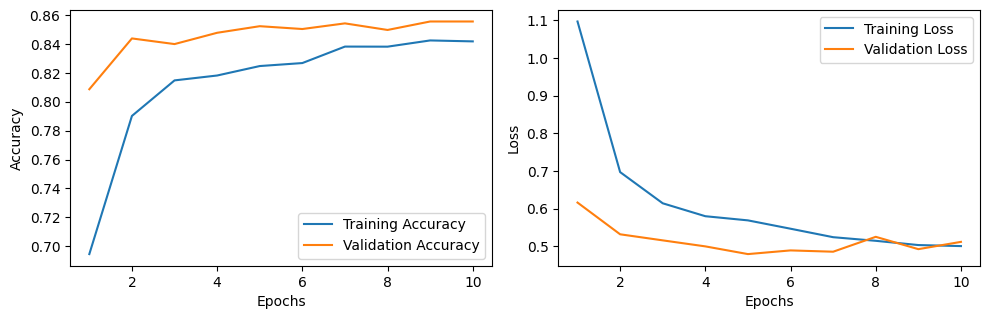

In [ ]:
plot_model_graph(history)

In [ ]:
model.evaluate(valid_data)

48/48 [==============================] - 98s 2s/step - loss: 0.5122 - accuracy: 0.8557


[0.5122093558311462, 0.8557441234588623]

In [ ]:
import pathlib

train_dir = "/content/train"
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['apple' 'banana' 'beetroot' 'bell pepper' 'cabbage' 'capsicum' 'carrot'
 'cauliflower' 'chilli pepper' 'corn' 'cucumber' 'eggplant' 'garlic'
 'ginger' 'grapes' 'jalepeno' 'kiwi' 'lemon' 'lettuce' 'mango' 'onion'
 'orange' 'paprika' 'pear' 'peas' 'pineapple' 'pomegranate' 'potato'
 'raddish' 'soy beans' 'spinach' 'sweetcorn' 'sweetpotato' 'tomato'
 'turnip' 'watermelon']


In [ ]:
IMG_SIZE = 224

def load_and_pred_images(img_url, IMG_SIZE = 224):
  # Read image
  image = tf.io.read_file(img_url)
  # Decode image
  image = tf.io.decode_image(image)
  # Rescale image
  image = tf.image.resize(image,
                          size=[IMG_SIZE, IMG_SIZE])
  # Resize the image
  image = image/255.

  return image

In [ ]:
def pred_and_plot_images(model, img_url, class_names=class_names):
  image = load_and_pred_images(img_url)

  # Make a prediction
  pred = model.predict(tf.expand_dims(image, axis=0))
  print(pred)

  pred_class = class_names[tf.argmax(pred[0]).numpy()]

  plt.imshow(image)
  plt.title(f"Prediction : {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 251ms/step
[[2.50549929e-04 3.75723648e-05 3.45120221e-09 2.86321801e-06
  1.30099209e-09 1.10585770e-05 2.92447595e-07 1.88915337e-08
  6.50964694e-07 9.37872483e-06 1.30353210e-05 9.81384147e-08
  1.00589084e-07 8.62456329e-09 4.04908063e-09 1.09882086e-08
  6.77755679e-06 8.75273287e-01 2.28549675e-06 1.17314198e-06
  1.48818913e-07 1.24374069e-01 1.83091527e-06 2.95197697e-06
  4.48543460e-07 7.45212765e-06 3.27535759e-07 6.00295323e-07
  9.74819230e-08 7.61713821e-08 1.45170031e-06 3.73797384e-08
  3.25973453e-08 7.11513962e-07 4.56508331e-10 7.30984084e-07]]


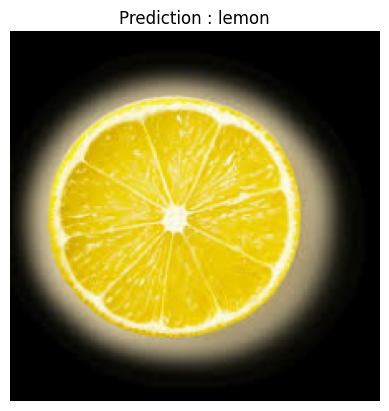

In [ ]:
pred_and_plot_images(model, "/content/lemon_5.jpeg", class_names);

In [ ]:
model.save("mobilenet_v2__f_and_v_image_recognition_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# Assume 'KerasLayer' refers to a layer from 'tensorflow_hub'


def load_and_use_model(model_path):
    """Loads the model with required custom objects."""
    # Import necessary module for custom objects, e.g. tensorflow_hub
    import tensorflow_hub as hub


    # Define custom objects to handle KerasLayer and potentially other objects
    custom_objects = {'KerasLayer': hub.KerasLayer}  # 'KerasLayer' mapped to 'hub.KerasLayer'

    # Load the model using custom_objects argument
    loaded_model = tf.keras.models.load_model(model_path, custom_objects=custom_objects)
    return loaded_model

# Loading the model
loaded_model = load_and_use_model('/content/drive/MyDrive/Ai_Ml_data/Image Classification/mobilenet_v2__f_and_v_image_recognition_model.h5')

# Show the model architecture
loaded_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 1001)              5432713   
 KerasLayer)                                                     
                                                                 
 output_layer (Dense)        (None, 36)                36072     
                                                                 
Total params: 5468785 (20.86 MB)
Trainable params: 36072 (140.91 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


In [ ]:
loaded_model.evaluate(valid_data)

48/48 [==============================] - 101s 2s/step - loss: 0.5122 - accuracy: 0.8557


[0.5122093558311462, 0.8557441234588623]

1/1 [==============================] - 0s 185ms/step
[[4.64304328e-09 2.03581976e-07 1.74994741e-09 8.22920299e-07
  1.66462840e-07 3.33325284e-10 9.99882698e-01 1.94207800e-07
  1.26777016e-08 4.49305026e-06 3.72397990e-05 3.04390763e-13
  4.14124846e-10 1.64150479e-05 3.98393318e-08 3.68485841e-12
  8.84733051e-11 6.67177619e-06 1.86613242e-11 1.31526363e-08
  2.19950152e-06 2.13966250e-05 3.40951600e-09 2.98301188e-06
  1.75477737e-07 6.79094501e-06 3.69998929e-07 3.00075362e-06
  6.00898375e-06 1.02017034e-10 6.57271615e-09 3.86495671e-08
  3.27061713e-07 2.52254120e-12 1.28967337e-09 7.66295580e-06]]


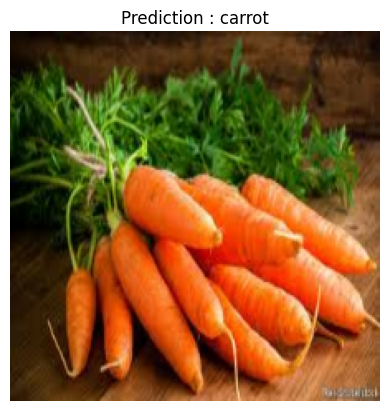

In [ ]:
pred_and_plot_images(loaded_model, "/content/carrot.jpeg", class_names);